# Import necessary libraries

In [1]:
# Import necessary libraries
import pandas as pd #to create and manipulate dataframes
import numpy as np  #create arrays
import matplotlib.pyplot as plt #to plot and show plots
import seaborn as sns #to plot and show encoded color matrix
from sklearn.model_selection import train_test_split  #split arrays
from sklearn.preprocessing import LabelEncoder  #encode target labels
from sklearn.impute import SimpleImputer   #Imputes missing values.
from sklearn.feature_selection import RFE  #Recursive feature elimination.
from sklearn.linear_model import LogisticRegression  #Logistic Regression model.
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  #Grid search with cross-validation/Randomized search with cross-validation.
from sklearn.metrics import roc_auc_score, roc_curve, auc  #Compute Area Under the Receiver Operating Characteristic Curve 
from sklearn.metrics import mean_absolute_error  #Mean absolute error regression loss
from sklearn.metrics import accuracy_score  #Accuracy classification score
from sklearn.tree import DecisionTreeClassifier   #Decision Tree Classifier.
from sklearn import svm  
from sklearn.svm import SVC  #Support Vector Classification.
from sklearn.linear_model import LinearRegression   #Linear Regression model.
from sklearn.neighbors import KNeighborsClassifier  #k-Nearest Neighbors classifier.
from sklearn.naive_bayes import GaussianNB   #Gaussian Naive Bayes classifier.


In [2]:
# Load the dataset description using Pandas
description_df = pd.read_csv('VariableDescription.csv')

In [3]:
description_df.head()

,Variable,Description
0,Customer Id,Identification number for the Policy holder
1,YearOfObservation,year of observation for the insured policy
2,Insured_Period,duration of insurance policy in Olusola Insura...
3,Residential,is the building a residential building or not
4,Building_Painted,"is the building painted or not (N-Painted, V-N..."


In [4]:
# Load the dataset train using Pandas
train_df = pd.read_csv('train_data.csv')

In [5]:
#drop columns
train_df2=train_df.drop(columns=['Customer Id', 'Geo_Code'])

In [6]:
# Load the dataset test using Pandas
test_df = pd.read_csv('test_data.csv')

In [7]:
#drop columns
test_df2=test_df.drop(columns=['Customer Id', 'Geo_Code'])

In [8]:
test_df2.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows
0,2013,1.000000,0,V,N,O,R,300.0,1,1960.0,3
1,2016,0.997268,0,V,N,O,R,300.0,1,1960.0,3
2,2013,0.369863,0,V,V,V,U,790.0,1,1960.0,.
3,2014,1.000000,0,V,N,O,R,1405.0,1,2004.0,3
4,2016,1.000000,0,V,N,O,R,1405.0,1,2004.0,3


In [9]:
# Load the dataset SampleSubmission
Submission_df = pd.read_csv('SampleSubmission.csv')

In [10]:
Submission_df.head()

,Customer Id,Claim
0,H0,1
1,H10000,1
2,H10001,1
3,H10002,1
4,H10003,1


# Explore the data's structure, distributions, and missing values

In [11]:
print(train_df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7160 entries, 0 to 7159
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   YearOfObservation   7160 non-null   int64  
 1   Insured_Period      7160 non-null   float64
 2   Residential         7160 non-null   int64  
 3   Building_Painted    7160 non-null   object 
 4   Building_Fenced     7160 non-null   object 
 5   Garden              7153 non-null   object 
 6   Settlement          7160 non-null   object 
 7   Building Dimension  7054 non-null   float64
 8   Building_Type       7160 non-null   int64  
 9   Date_of_Occupancy   6652 non-null   float64
 10  NumberOfWindows     7160 non-null   object 
 11  Claim               7160 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 671.4+ KB
None


In [12]:
print(train_df2.describe())

       YearOfObservation  Insured_Period  Residential  Building Dimension  \
count        7160.000000     7160.000000  7160.000000         7054.000000   
mean         2013.669553        0.909758     0.305447         1883.727530   
std             1.383769        0.239756     0.460629         2278.157745   
min          2012.000000        0.000000     0.000000            1.000000   
25%          2012.000000        0.997268     0.000000          528.000000   
50%          2013.000000        1.000000     0.000000         1083.000000   
75%          2015.000000        1.000000     1.000000         2289.750000   
max          2016.000000        1.000000     1.000000        20940.000000   

       Building_Type  Date_of_Occupancy        Claim  
count    7160.000000        6652.000000  7160.000000  
mean        2.186034        1964.456404     0.228212  
std         0.940632          36.002014     0.419709  
min         1.000000        1545.000000     0.000000  
25%         2.000000        196

In [13]:
print(train_df2.head())

   YearOfObservation  Insured_Period  Residential Building_Painted  \
0               2013             1.0            0                N   
1               2015             1.0            0                V   
2               2014             1.0            0                N   
3               2013             1.0            0                V   
4               2014             1.0            0                V   

  Building_Fenced Garden Settlement  Building Dimension  Building_Type  \
0               V      V          U               290.0              1   
1               N      O          R               490.0              1   
2               V      V          U               595.0              1   
3               V      V          U              2840.0              1   
4               N      O          R               680.0              1   

   Date_of_Occupancy NumberOfWindows  Claim  
0             1960.0               .      0  
1             1850.0               4      

In [14]:
train_df2.shape

(7160, 12)

In [16]:
# Viewing all coulmns as rows
train_df2.head().T

,0,1,2,3,4
YearOfObservation,2013,2015,2014,2013,2014
Insured_Period,1.0,1.0,1.0,1.0,1.0
Residential,0,0,0,0,0
Building_Painted,N,V,N,V,V
Building_Fenced,V,N,V,V,N
Garden,V,O,V,V,O
Settlement,U,R,U,U,R
Building Dimension,290.0,490.0,595.0,2840.0,680.0
Building_Type,1,1,1,1,1
Date_of_Occupancy,1960.0,1850.0,1960.0,1960.0,1800.0


some columns contain contain strings and integer values
some columns have have dots which may not be regarded as missing values

In [17]:
# Converting the values in the numberofwindows column that are not numeric and... 
#...contain the string '.' and replacing them with the median.

train_df2['NumberOfWindows'] = pd.to_numeric(train_df2['NumberOfWindows'], errors='coerce')

# Calculating the median value (ignoring NaN)
median_value = round(train_df2['NumberOfWindows'].median(skipna=True))

# Replaceing NaN values with the median
train_df2['NumberOfWindows'].fillna(median_value, inplace=True)

# Converting the column to an integer
train_df2['NumberOfWindows'] = train_df2['NumberOfWindows'].astype(int)

In [38]:
# Summary of statistics with float values limited to 3 decimal places
train_df2.describe().round(3)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
count,7046.000,7046.000,7046.000,7046.000,7046.000,7046.000,7046.000,7046.000,7046.000,7046.000,7046.000,7046.000
mean,2013.684,0.909,0.308,0.756,0.489,0.489,0.489,1900.457,2.189,1964.449,4.113,0.231
std,1.384,0.241,0.462,0.430,0.500,0.500,0.500,2272.722,0.944,34.923,1.174,0.421
min,2012.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1545.000,1.000,0.000
25%,2012.000,0.997,0.000,1.000,0.000,0.000,0.000,540.000,2.000,1960.000,4.000,0.000
50%,2013.000,1.000,0.000,1.000,0.000,0.000,0.000,1116.000,2.000,1964.449,4.000,0.000
75%,2015.000,1.000,1.000,1.000,1.000,1.000,1.000,2280.000,3.000,1980.000,4.000,0.000
max,2016.000,1.000,1.000,1.000,1.000,1.000,1.000,20940.000,4.000,2016.000,9.000,1.000


In [39]:
#missing values
train_df2.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
Claim                 0
dtype: int64

In [40]:
# Finding columns with missing values

columns_with_missing_values = train_df2.columns[train_df2.isna().any()]
columns_with_missing_values

Index([], dtype='object')

# preprocessing test dataset

In [41]:
#missing values
test_df2.isnull().sum()

YearOfObservation     0
Insured_Period        0
Residential           0
Building_Painted      0
Building_Fenced       0
Garden                0
Settlement            0
Building Dimension    0
Building_Type         0
Date_of_Occupancy     0
NumberOfWindows       0
dtype: int64

In [42]:
# Viewing all coulmns as rows
test_df2.head().T

,0,1,2,3,4
YearOfObservation,2013.0,2016.000000,2013.000000,2014.0,2016.0
Insured_Period,1.0,0.997268,0.369863,1.0,1.0
Residential,0.0,0.000000,0.000000,0.0,0.0
Building_Painted,1.0,1.000000,1.000000,1.0,1.0
Building_Fenced,0.0,0.000000,1.000000,0.0,0.0
Garden,0.0,0.000000,1.000000,0.0,0.0
Settlement,0.0,0.000000,1.000000,0.0,0.0
Building Dimension,300.0,300.000000,790.000000,1405.0,1405.0
Building_Type,1.0,1.000000,1.000000,1.0,1.0
Date_of_Occupancy,1960.0,1960.000000,1960.000000,2004.0,2004.0


# Converting the values in the numberofwindows column that are not numeric and...

In [44]:

#...contain the string '.' and replacing them with the median.

test_df2['NumberOfWindows'] = pd.to_numeric(test_df2['NumberOfWindows'], errors='coerce')

# Calculating the median value (ignoring NaN)
median_value = round(test_df2['NumberOfWindows'].median(skipna=True))

# Replaceing NaN values with the median
test_df2['NumberOfWindows'].fillna(median_value, inplace=True)

# Converting the column to an integer
test_df2['NumberOfWindows'] = test_df2['NumberOfWindows'].astype(int)

In [45]:
# Summary of statistics with float values limited to 3 decimal places

test_df2.describe().round(3)

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows
count,2952.000,2952.000,2952.000,2952.000,2952.000,2952.000,2952.000,2952.000,2952.000,2952.000,2952.000
mean,2013.617,0.920,0.225,0.549,0.721,0.722,0.721,1701.804,2.363,1966.879,4.065
std,1.374,0.223,0.418,0.498,0.449,0.448,0.449,2279.668,1.007,22.365,0.864
min,2012.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1750.000,1.000
25%,2012.000,1.000,0.000,0.000,0.000,0.000,0.000,483.750,2.000,1960.000,4.000
50%,2013.000,1.000,0.000,1.000,1.000,1.000,1.000,914.000,2.000,1966.879,4.000
75%,2015.000,1.000,0.000,1.000,1.000,1.000,1.000,2000.000,3.000,1980.000,4.000
max,2016.000,1.000,1.000,1.000,1.000,1.000,1.000,30745.000,4.000,2012.000,9.000


# use SimpleImputer strategy for the test dataset

In [46]:
# after identifying numerical and categorical columns
numerical_cols = ['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows']
categorical_cols = ['Building_Painted', 'Building_Fenced', 'Garden',
       'Settlement']

# Impute numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
test_df2[numerical_cols] = numerical_imputer.fit_transform(test_df2[numerical_cols])

# Impute categorical columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
test_df2[categorical_cols] = categorical_imputer.fit_transform(test_df2[categorical_cols])

In [47]:
# Encode categorical variables in test data
label_encoder = LabelEncoder()
categorical_cols = test_df2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    test_df2[col] = label_encoder.fit_transform(test_df2[col])

# visualisation of feature-claim 

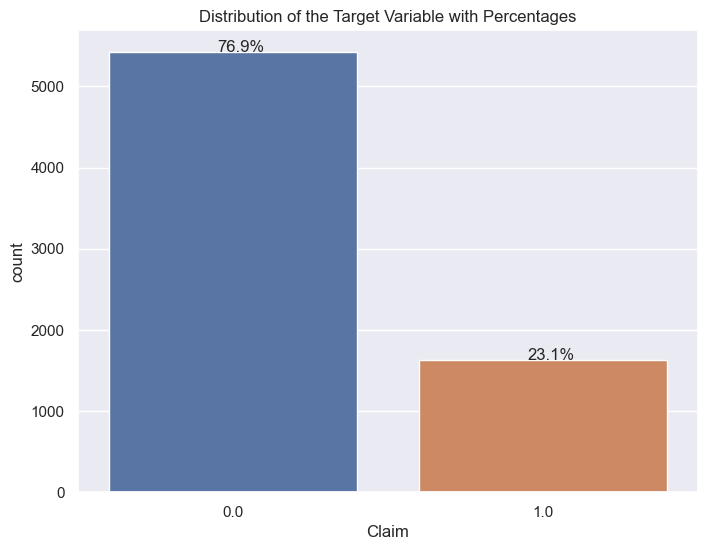

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Claim' is the target variable and 'train_df' is your DataFrame
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

# Plotting the countplot
ax = sns.countplot(x='Claim', data=train_df2)

# Adding percentages to the bars
total = len(train_df2['Claim'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2 - 0.05
    y = p.get_height() + 0.1
    ax.annotate(percentage, (x, y), size=12)

# Setting plot title
plt.title('Distribution of the Target Variable with Percentages')
plt.show()


most bulding's claim status is zero

In [29]:

#...contain the string '.' and replacing them with the median.

train_df2['NumberOfWindows'] = pd.to_numeric(train_df2['NumberOfWindows'], errors='coerce')

# Calculating the median value (ignoring NaN)
median_value = round(train_df2['NumberOfWindows'].median(skipna=True))

# Replaceing NaN values with the median
train_df2['NumberOfWindows'].fillna(median_value, inplace=True)

# Converting the column to an integer
train_df2['NumberOfWindows'] = train_df2['NumberOfWindows'].astype(int)

# examine numerical features(columns) and categorical features(columns)

In [30]:
# Identify numeric and non-numeric columns
numeric_columns = train_df2.select_dtypes(include='number').columns
non_numeric_columns = train_df2.select_dtypes(exclude='number').columns

# Impute missing values in numeric columns with the mean
train_df2[numeric_columns] = train_df2[numeric_columns].fillna(train_df2[numeric_columns].mean())

# Impute missing values in non-numeric columns with the most frequent value
train_df2[non_numeric_columns] = train_df2[non_numeric_columns].fillna(train_df2[non_numeric_columns].mode().iloc[0])

# Identify categorical columns
categorical_columns = train_df2.select_dtypes(include='object').columns

# Print the names of categorical columns
print("Categorical Columns:", categorical_columns)
print("Numerical columns:", numeric_columns)


Categorical Columns: Index(['Building_Painted', 'Building_Fenced', 'Garden', 'Settlement'], dtype='object')
Numerical columns: Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Claim'],
      dtype='object')


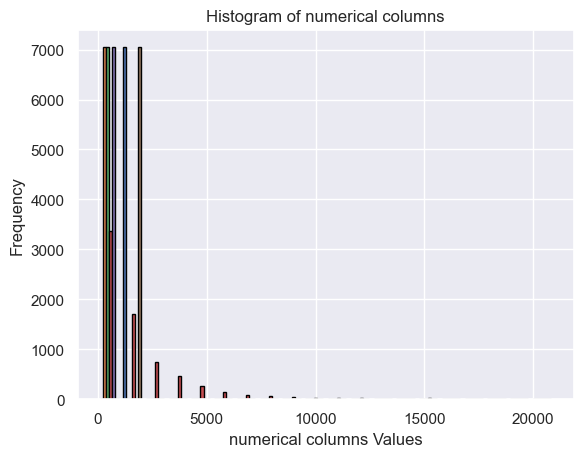

In [31]:
# Visualizing the distribution of the data using a histogram

numerical_columns = ['YearOfObservation', 'Insured_Period', 'Residential', 
            'Building Dimension', 'Building_Type', 'Date_of_Occupancy']

# Plotting a histogram
plt.hist(train_df2[numerical_columns], bins=20, edgecolor='black')
plt.title('Histogram of numerical columns')
plt.xlabel('numerical columns Values')
plt.ylabel('Frequency')
plt.show()

# distribution of numerical features in train dataset

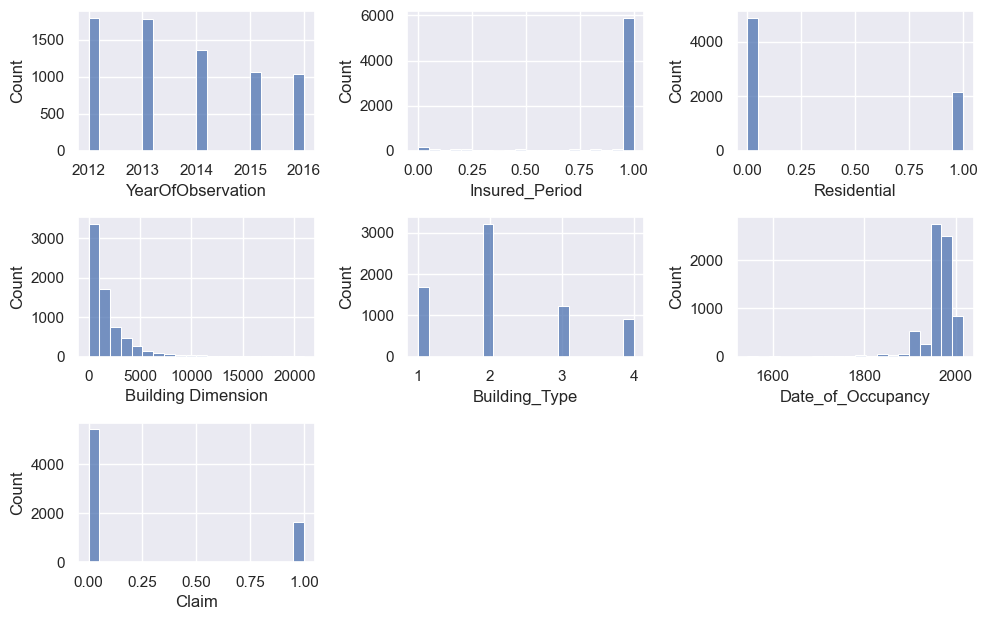

In [32]:
numerical_list = ['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy', 'Claim']

plt.figure(figsize=(10, 10))
for i, column in enumerate(numerical_list, 1):
    plt.subplot(5, 3, i)
    sns.histplot(train_df2[column], bins=20)
plt.tight_layout()
plt.show()

majority houses were observed for insurance in 2012 and 2013
the vast majority of houses have been insured for the duration of 1 year
most bildings are not residential
most buildings are less than 5000 sq metres in dimension
most buldings are type 2
most buildings were first occupied in the 2000s
most buildings have not been passed for the insurance claim

# SimpleImputer with 'most_frequent' strategy for categorical features and 'mean' for numerical features
replace missin values with the most common/frequent value in each categorical column and mean for numerical columns

In [33]:

# identified categorical columns and numerical columns
numerical_cols = ['YearOfObservation', 'Insured_Period', 'Residential',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Claim']
categorical_cols = ['Building_Painted', 'Building_Fenced', 'Garden',
       'Settlement']

# Impute numerical columns with mean
numerical_imputer = SimpleImputer(strategy='mean')
train_df2[numerical_cols] = numerical_imputer.fit_transform(train_df2[numerical_cols])

# Impute categorical columns with most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_df2[categorical_cols] = categorical_imputer.fit_transform(train_df2[categorical_cols])

In [34]:
train_df2.head().T

,0,1,2,3,4
YearOfObservation,2013.0,2015.0,2014.0,2013.0,2014.0
Insured_Period,1.0,1.0,1.0,1.0,1.0
Residential,0.0,0.0,0.0,0.0,0.0
Building_Painted,N,V,N,V,V
Building_Fenced,V,N,V,V,N
Garden,V,O,V,V,O
Settlement,U,R,U,U,R
Building Dimension,290.0,490.0,595.0,2840.0,680.0
Building_Type,1.0,1.0,1.0,1.0,1.0
Date_of_Occupancy,1960.0,1850.0,1960.0,1960.0,1800.0


In [35]:
# Encode categorical variables if necessary
label_encoder = LabelEncoder()
categorical_cols = train_df2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    train_df2[col] = label_encoder.fit_transform(train_df2[col])

In [36]:
train_df2.head()

,YearOfObservation,Insured_Period,Residential,Building_Painted,Building_Fenced,Garden,Settlement,Building Dimension,Building_Type,Date_of_Occupancy,NumberOfWindows,Claim
0,2013.0,1.0,0.0,0,1,1,1,290.0,1.0,1960.0,4.0,0.0
1,2015.0,1.0,0.0,1,0,0,0,490.0,1.0,1850.0,4.0,0.0
2,2014.0,1.0,0.0,0,1,1,1,595.0,1.0,1960.0,4.0,0.0
3,2013.0,1.0,0.0,1,1,1,1,2840.0,1.0,1960.0,4.0,0.0
4,2014.0,1.0,0.0,1,0,0,0,680.0,1.0,1800.0,3.0,0.0


# disribution of categorical features in train dataset

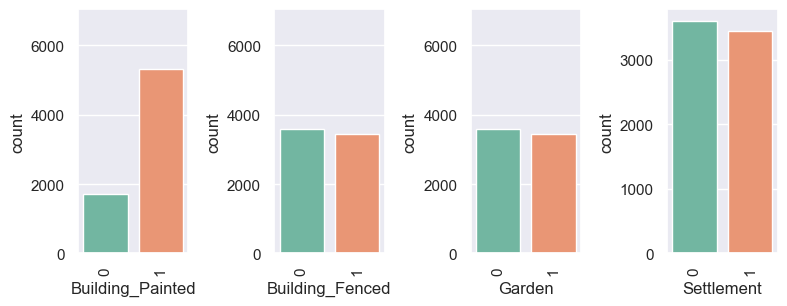

In [37]:
categorical_list = ['Building_Painted', 'Building_Fenced', 'Garden',
       'Settlement']

# Create subplots
plt.figure(figsize=(10, 15))
gridspec = plt.GridSpec(5, 5)
locator1, locator2 = [0, 0]

for column in categorical_list:
    plt.subplot(gridspec[locator1, locator2])
    sns.countplot(data=train_df2, x=column, palette='Set2')
    plt.xticks(rotation=90)
    
    locator2 += 1
    if locator2 == 4:
        locator1 += 1
        locator2 = 0
        continue
    if locator1 == 7:
        break

    # Set the y-axis limits to display more values
    plt.ylim(0, len(train_df2))  # You can adjust the range as needed

plt.tight_layout()
plt.show()

most buildings are painted,
most buildings have between less than 4 windows,

# Task 2: Feature Selection

# Select relevant features for building the predictive model

In [178]:
# Separate the target variable (Claim) from the features
X = train_df2.drop(columns=['Claim'])
y = train_df2['Claim']

# Initialize the RFE with a logistic regression model
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=8)  # You can adjust the number of selected features

# Fit the RFE to the data
fit = rfe.fit(X, y)

# Get the ranking of each feature
feature_ranking = pd.DataFrame({'Feature': X.columns, 'Rank': fit.ranking_})

# Select the top n ranked features (e.g., top 5)
selected_features = feature_ranking[feature_ranking['Rank'] == 1]['Feature'].tolist()
print("Selected Features:")
print(selected_features)

Selected Features:
['Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'NumberOfWindows']


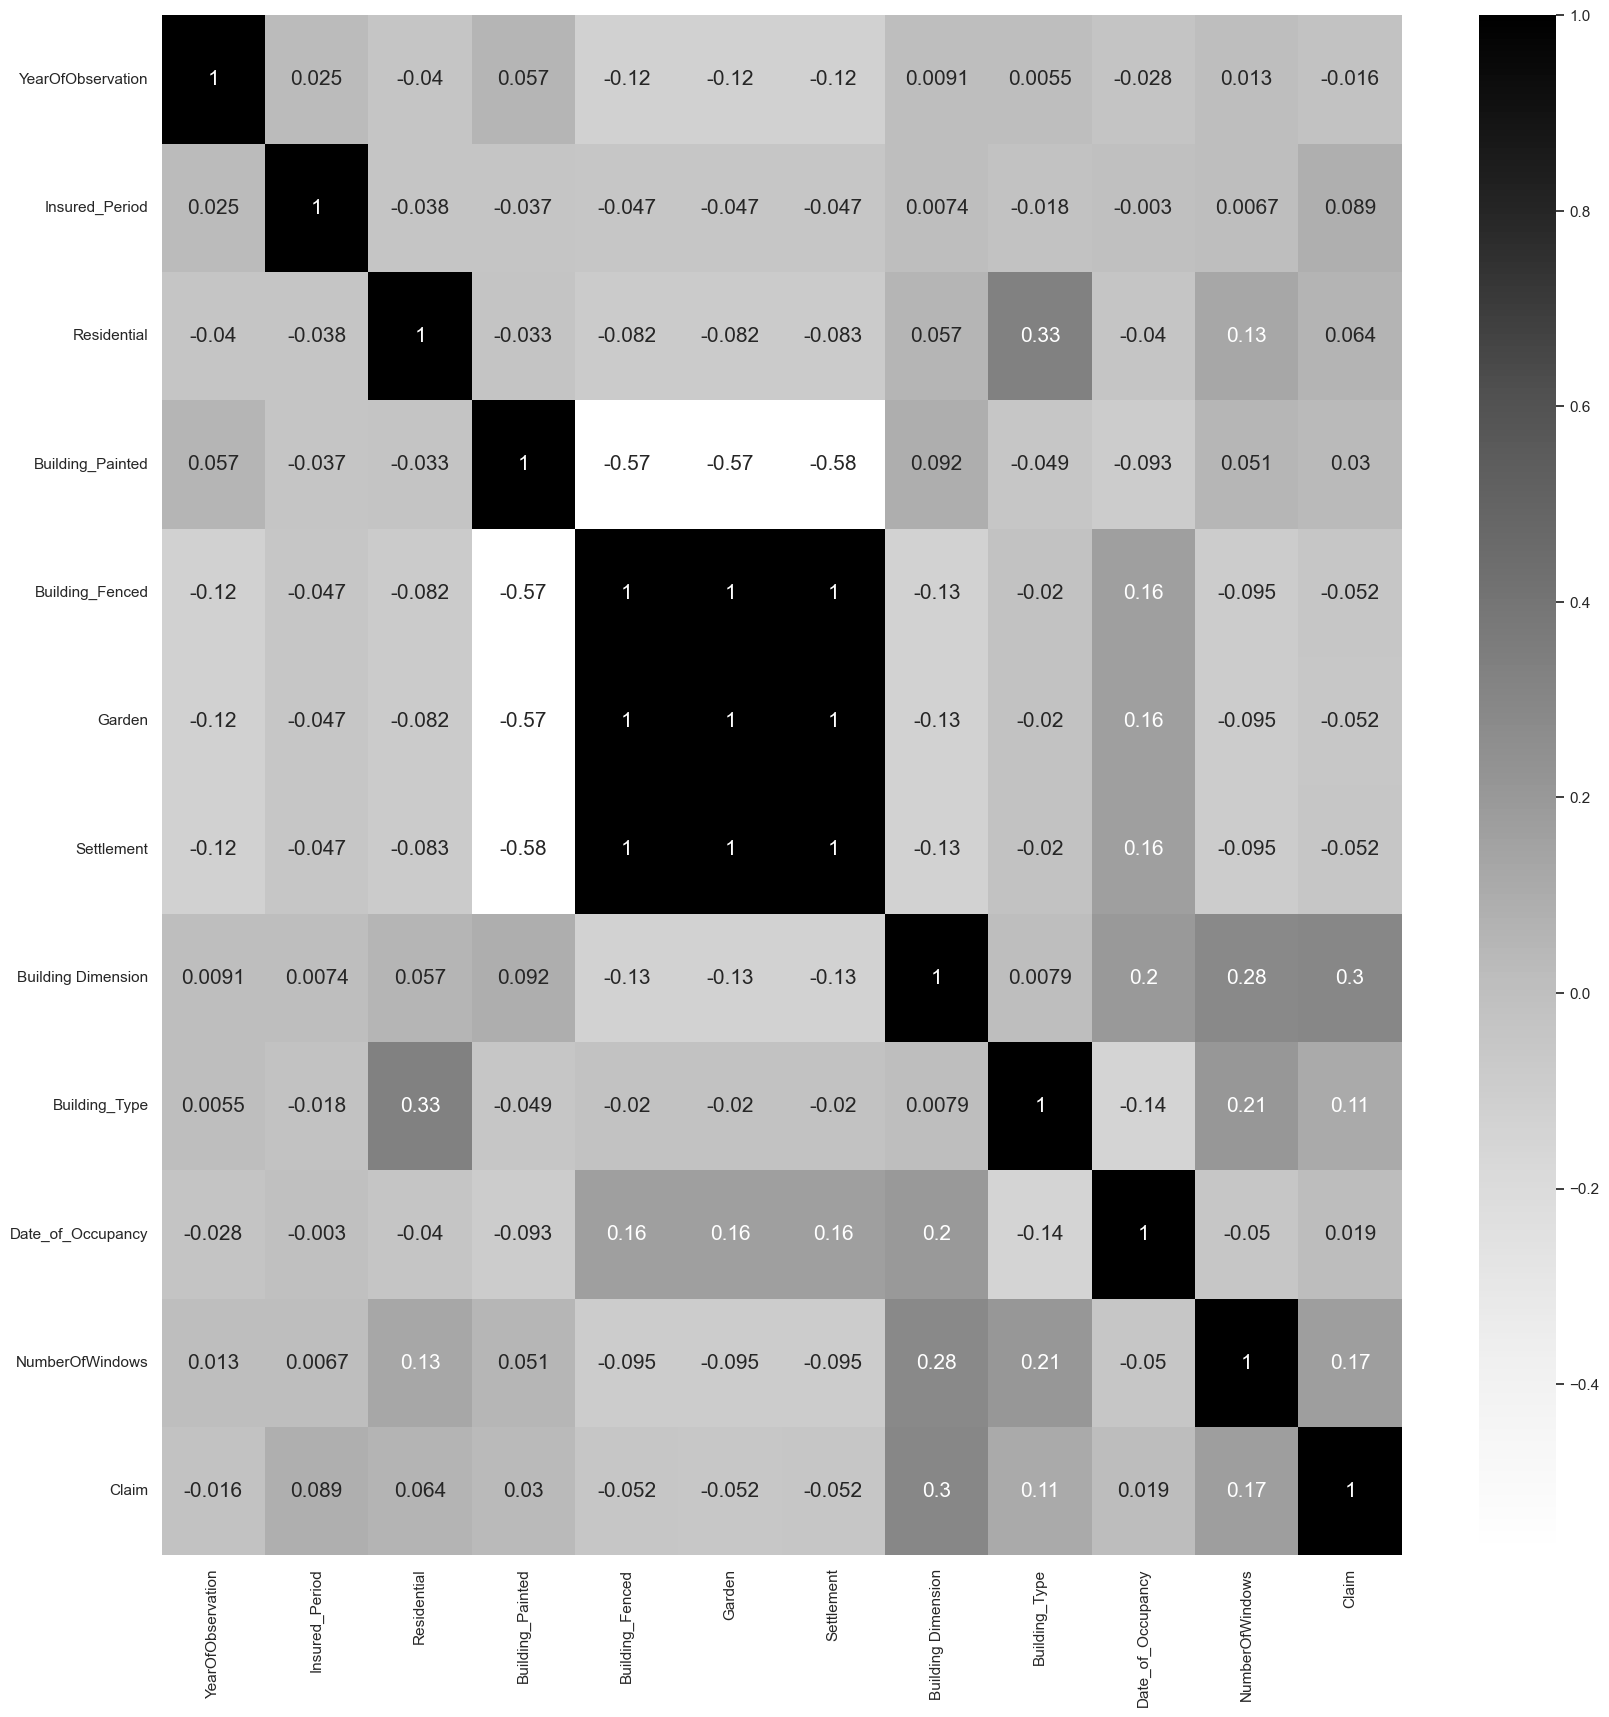

In [179]:
# Filter the DataFrame to include only numeric columns
numeric_columns = train_df2.select_dtypes(include=[int, float])

# Create a correlation heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="Greys", annot_kws={"size": 15})
plt.show()

Garden, building_fenced, and settlement are correlated
Garden, building_fenced, and settlement are correlated are also correlated with NumberOfWindows


In [180]:
# Feature Selection
selected_features = ['Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'NumberOfWindows']
X = train_df2[selected_features]
y = train_df2['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# verify selected features and columns in the training dataset and test dataset

In [181]:
# Print selected_features and compare with the columns of test_df2
print("Selected Features:", selected_features)
print("Columns in train_df2:", train_df2.columns)

Selected Features: ['Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'NumberOfWindows']
Columns in train_df2: Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows', 'Claim'],
      dtype='object')


In [182]:
# Print selected_features and compare with the columns of test_df2
print("Selected Features:", selected_features)
print("Columns in test_df2:", test_df2.columns)

Selected Features: ['Insured_Period', 'Residential', 'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement', 'Building_Type', 'NumberOfWindows']
Columns in test_df2: Index(['YearOfObservation', 'Insured_Period', 'Residential',
       'Building_Painted', 'Building_Fenced', 'Garden', 'Settlement',
       'Building Dimension', 'Building_Type', 'Date_of_Occupancy',
       'NumberOfWindows'],
      dtype='object')


# Task 3: Model Building


In [183]:
# Specify the name of your target variable
target_variable = 'Claim' 
# Split the dataset into features (X) and the target variable (y)
X = train_df2.drop(columns=[target_variable])
y = train_df2[target_variable]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#  implement models

In [184]:
# Implement SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

SVC(probability=True)

In [185]:
# Implement SVM model
model = SVC(probability=True)
model.fit(X_train, y_train)
X_train.iloc[:5]
model.score(X_val, y_val)

0.7730446927374302

In [186]:
# Implement Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [187]:
# Make predictions and calculate AUC
lr_predictions = lr_model.predict(X_val)
auc_score = roc_auc_score(y_val, lr_predictions)

# Print the AUC score
print(f"LinearRegression AUC: {auc_score}")

LinearRegression AUC: 0.7165995877098262


In [52]:
# Implement KNN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [188]:
# Make predictions and calculate AUC
knn_predictions = knn_model.predict_proba(X_val)[:, 1]
knn_auc = roc_auc_score(y_val, knn_predictions)

# Print the AUC score
print(f"KNN AUC: {knn_auc}")

KNN AUC: 0.6158761711549579


In [189]:
# Implement Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [190]:
# Make predictions and calculate AUC
nb_predictions = nb_model.predict_proba(X_val)[:, 1]
nb_auc = roc_auc_score(y_val, nb_predictions)

# Print the AUC score
print(f"Naive Bayes AUC: {nb_auc}")


Naive Bayes AUC: 0.6756923311846253


In [191]:
# Create a logistic regression model
logistic_model = LogisticRegression()

# Fit the logistic regression model to the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

# Tune hyperparameters for each model using techniques like Grid Search or Random Search

In [194]:
# Define the hyperparameters and their search space
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
}

# Create a decision tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Use GridSearchCV to perform hyperparameter tuning
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", grid_search.best_params_)

# Train the model with the best hyperparameters
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = best_clf.predict(X_test)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Test Set Accuracy: {:.2f}%".format(accuracy * 100))


Best Hyperparameters:  {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Test Set Accuracy: 77.16%


after tuning hyperparaments the test accuracy score is 77.16%

# Task 4: Model Evaluation

In [195]:
def evaluate_classification_model(model, X, y):
    """
    Evaluate a classification model using the area under the ROC curve (AUC).
    """
    y_pred_proba = model.predict_proba(X)[:, 1]
    auc = roc_auc_score(y, y_pred_proba)
    return auc
# Define SVM model
svm_model = SVC(probability=True) 
# Fit SVM model on training data
svm_model.fit(X_train, y_train)

# Define K-Nearest Neighbors model
knn_model = KNeighborsClassifier() 
# Fit K-Nearest Neighbors model on training data
knn_model.fit(X_train, y_train)

# Define Naive Bayes model
nb_model = GaussianNB() 

# Fit Naive Bayes model on training data
nb_model.fit(X_train, y_train)

# Define Linear Regression model
lr_model = LinearRegression() 
lr_model.fit(X_train, y_train)

# Evaluate SVM model
svm_auc = evaluate_classification_model(svm_model, X_val, y_val)

# Evaluate K-Nearest Neighbors model
knn_auc = evaluate_classification_model(knn_model, X_val, y_val)

# Evaluate Naive Bayes model
nb_auc = evaluate_classification_model(nb_model, X_val, y_val)

# Print the AUC scores for the classification models
print("SVM AUC:", svm_auc)
print("K-Nearest Neighbors AUC:", knn_auc)
print("Naive Bayes AUC:", nb_auc)

# Make predictions
lr_predictions = lr_model.predict(X_val)

# Calculate MAE for the regression model
mae = mean_absolute_error(y_val, lr_predictions)

# Print the MAE (mean absolute error) for the Linear Regression model
print("Linear Regression MAE:", mae)


SVM AUC: 0.5697457543928537
K-Nearest Neighbors AUC: 0.6158761711549579
Naive Bayes AUC: 0.6756923311846253
Linear Regression MAE: 0.31774365690310036


the SVM AUC of 0.618 and Naive Bayes of 0.569 indicates a moderate level of discrimination ability. The closer the AUC is to 1, the better the model is at distinguishing between positive and negative instances.
A k-nearest-AUC of 0.615 suggests a moderate ability to discriminate between positive and negative instances.
linear-Regression MAE (Mean Absolute Error) of 0.31 , An AUC of 0.675 indicates a relatively good ability to discriminate between positive and negative instances.

# logistic regression Mean Squared Error and Accuracy

In [196]:
# after training a linear regression model (lr_model)
lr_predicted_values = lr_model.predict(X_val)
true_labels_regression = y_val

# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error (MSE) for Linear Regression
mse = mean_squared_error(true_labels_regression, lr_predicted_values)

print(f"Linear Regression Mean Squared Error: {mse}")


Linear Regression Mean Squared Error: 0.1584144483094206


# Predicted Probabilities for the positives

Lower MSE values indicate better model performance, as it means that, on average, the model's predictions are closer to the true values.
An MSE of 0.158 suggests that, on average, the squared difference between the predicted probabilities and the actual binary outcomes is 0.158

# Area Under Curve Metrics

In [197]:
# Evaluate models using AUC metric

svm_pred_proba = svm_model.predict_proba(X_val)[:, 1]

knn_pred_proba = knn_model.predict_proba(X_val)[:, 1]
nb_pred_proba = nb_model.predict_proba(X_val)[:, 1]

svm_auc = roc_auc_score(y_val, svm_pred_proba)

knn_auc = roc_auc_score(y_val, knn_pred_proba)
nb_auc = roc_auc_score(y_val, nb_pred_proba)


# Compare the performance of different models
print(f'SVM AUC: {svm_auc}')

print(f'KNN AUC: {knn_auc}')
print(f'NB AUC: {nb_auc}')

SVM AUC: 0.5697457543928537
KNN AUC: 0.6158761711549579
NB AUC: 0.6756923311846253


# Logistic Regression ROC-AUC


Logistic Regression ROC-AUC Score: 0.7138591669120774


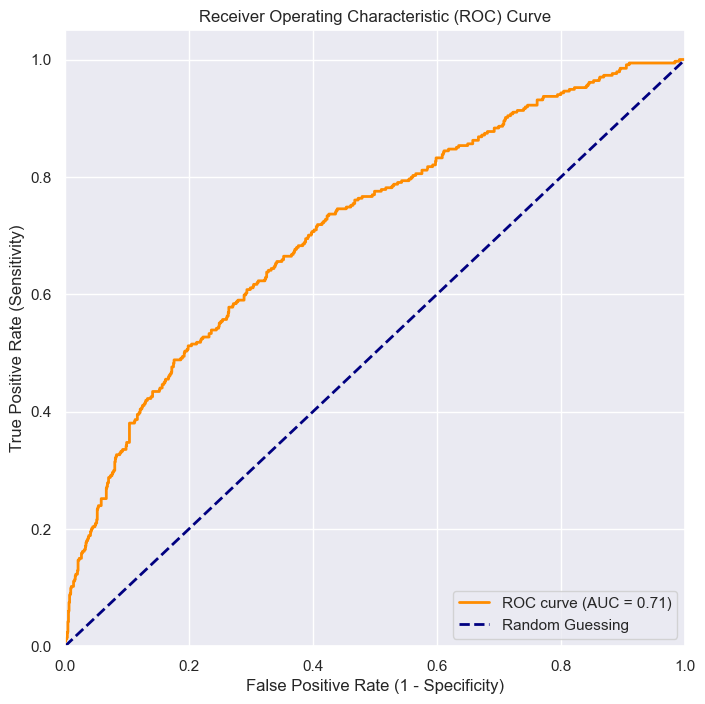

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already defined and trained your logistic regression model (lr_model)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

lr_predicted_probs = lr_model.predict_proba(X_val)[:, 1]  # Assuming binary classification and extracting probabilities for the positive class
true_labels = y_val  # Assuming y_val contains the true labels for your validation set

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(true_labels, lr_predicted_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)
print(f"Logistic Regression ROC-AUC Score: {roc_auc}")

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


ROC curve with an AUC of 0.71  indicates a moderate performance, it suggests that the model has a moderate ability to distinguish between positive and negative instances.model that has some discriminatory power but may benefit from further optimization.

# ROC AUC for SVM, KNN and NB

SVM ROC-AUC Score: 0.5697457543928537
KNN ROC-AUC Score: 0.6158761711549579
Naive Bayes ROC-AUC Score: 0.6756923311846253


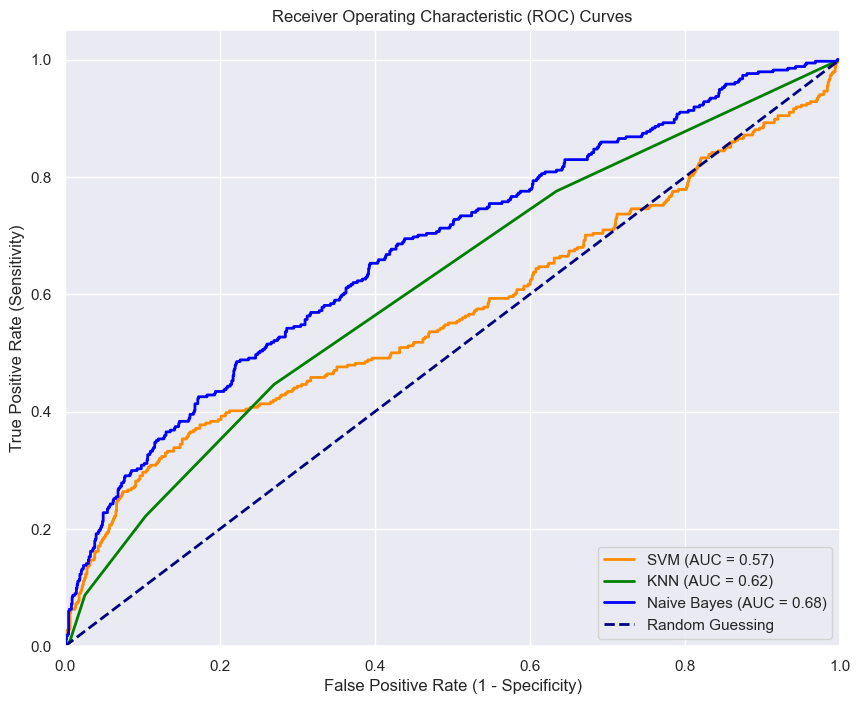

In [199]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already defined and trained your models
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_predicted_probs = svm_model.predict_proba(X_val)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_val, svm_predicted_probs)
roc_auc_svm = auc(fpr_svm, tpr_svm)
print(f"SVM ROC-AUC Score: {roc_auc_svm}")

# KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_predicted_probs = knn_model.predict_proba(X_val)[:, 1]
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_val, knn_predicted_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)
print(f"KNN ROC-AUC Score: {roc_auc_knn}")

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predicted_probs = nb_model.predict_proba(X_val)[:, 1]
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_val, nb_predicted_probs)
roc_auc_nb = auc(fpr_nb, tpr_nb)
print(f"Naive Bayes ROC-AUC Score: {roc_auc_nb}")

# Plot ROC curves
plt.figure(figsize=(10, 8))

# SVM
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')

# KNN
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label=f'KNN (AUC = {roc_auc_knn:.2f})')

# Naive Bayes
plt.plot(fpr_nb, tpr_nb, color='blue', lw=2, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')

# Random Guessing
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guessing')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()


# Task 5: Submission Preparation

In [206]:
import pandas as pd
# 'test_df2' is test DataFrame that has been preprocessed in a  similar way as the training data

# 'X_test' features for the test set  
X_test = test_df2

# Make predictions using the trained models
svm_predictions = svm_model.predict(X_test)
# Create a DataFrame for the submission
# Create a DataFrame for submission
submission_df = pd.DataFrame({'Customer Id': test_df['Customer Id'], 'Claim': test_pred_proba})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_SVM.csv', index=False)


SVM model implemented with the test dataset, submission file 'submission_SVM.csv' is generated

In [207]:
# 'test_df2' is your test DataFrame that has been preprocessed in a  similar way as the training data

# 'X_test' features for the test set  
X_test = test_df2

# Make predictions using the trained models
knn_predictions = knn_model.predict(X_test)

# Create a DataFrame for the submission
submission_df = pd.DataFrame({'Customer Id': test_df['Customer Id'], 'Claim': test_pred_proba})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_KNN.csv', index=False)


KNN model implemented with the test dataset, submission file 'submission_KNN.csv' is generated

In [208]:
# 'test_df2' is your test DataFrame that has been preprocessed in a  similar way as the training data

# 'X_test' features for the test set  
X_test = test_df2

# Make predictions using the trained models
nb_predictions = nb_model.predict(X_test)


# Create a DataFrame for the submission
submission_df = pd.DataFrame({'Customer Id': test_df['Customer Id'], 'Claim': test_pred_proba})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission_NB.csv', index=False)


NB model implemented with the test dataset, submission file 'submission_NB.csv' is generated

In [209]:
# 'test_df2' is your test DataFrame that has been preprocessed in a  similar way as the training data

# 'X_test' features for the test set  
X_test = test_df2

# Make predictions using the trained models
lr_predictions_test = lr_model.predict(X_test)

# Create a DataFrame for the submission
submission_df = pd.DataFrame({'Customer Id': test_df['Customer Id'], 'Claim': test_pred_proba})
# Save the DataFrame to a CSV file
submission_df.to_csv('submission_LR.csv', index=False)


LinearRegression model implemented with the test dataset, submission file 'submission_LR.csv' is generated